In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter
import random

In [2]:
#business.json path
#150K businesses
# businessses_path = "C:/Users/anton/source/data/Datasets/yelp_dataset/yelp_academic_dataset_business.json"
businessses_path = "/Users/david/Documents/Research2324/Sanner/Data/yelp_dataset/yelp_academic_dataset_business.json"

### Histogram of cities

In [3]:
businesses = []
with open(businessses_path, 'r', encoding='utf-8') as file:
    for line in file:
        business = json.loads(line)
        businesses.append(business)
        #filters:
        #if business['city'] == '':
            #businesses.append(business)

In [4]:
#sample entry:
businesses[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

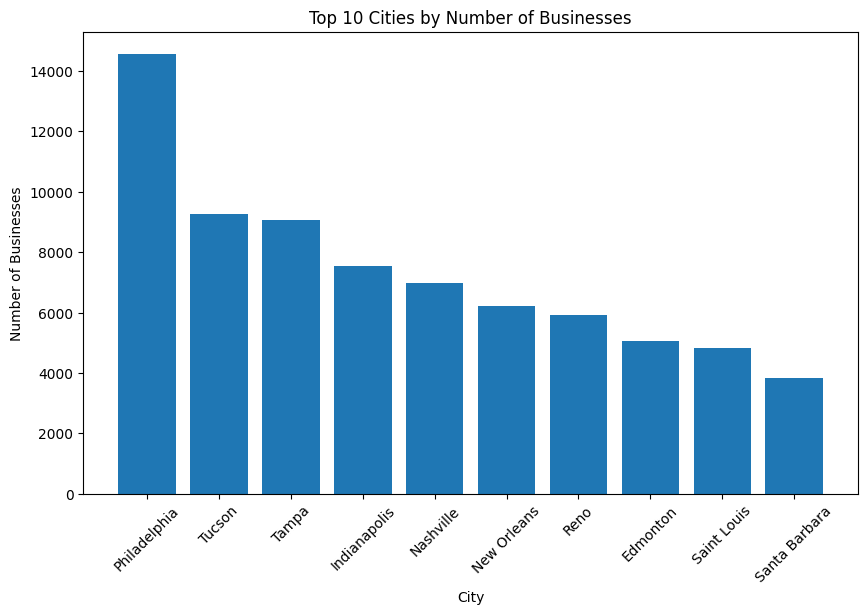

In [5]:
# Extract the city names from each business
cities = [business['city'] for business in businesses]

# Count the occurrences of each city
city_counts = Counter(cities)
top_cities = city_counts.most_common(10)
# Unzip the city names and counts for plotting
cities, counts = zip(*top_cities)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(cities, counts)
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Cities by Number of Businesses')
plt.xticks(rotation=45)
plt.show()

# Philadelphia only (most businesses)
Phili has 14.5 K businesses,


In [13]:
city = 'Philadelphia'
cities = ['Philadelphia','Tucson','Tampa','Indianapolis','Nashville','New Orleans','Reno','Edmonton','Saint Louis']
min_reviews = 50
#min number of category counts
min_cat_count = 5

In [14]:
businesses = []
with open(businessses_path, 'r', encoding='utf-8') as file:
    for line in file:
        business = json.loads(line)
        
        #filters:
        # if business['city'] == city \
        if business['city'] in cities \
        and business['review_count'] >= min_reviews \
        and 'Restaurants' in business['categories'].split(',') \
        and len(business['categories'].split(',')) >= min_cat_count:
        
            businesses.append(business)

In [15]:
len(businesses)

1057

In [16]:
#distribution of category counts (number of category tags)
cat_lengths = [len(business['categories'].split(',')) for business in businesses]
cat_length_counts = Counter(cat_lengths)
cat_length_counts

Counter({5: 340,
         6: 280,
         7: 180,
         8: 123,
         9: 59,
         10: 36,
         11: 16,
         12: 13,
         13: 4,
         14: 2,
         15: 2,
         16: 1,
         17: 1})

In [18]:
#take random 100 item sample
sample_size = 1000
random.seed(42)
businesses_100 = [businesses[i] for i in random.sample(range(len(businesses)),sample_size)]

In [19]:
#write category only 100 business sample
businesses_cats = {}
for i, business in enumerate(businesses_100):
    cats = business['categories']
    name = business['name']
    description = f' name: {name} \n categories: {cats}'
    businesses_cats[i] = {'description':description}

In [20]:
with open('data/yelp_cat_1000.json', 'w') as json_file:
    json.dump(businesses_cats, json_file, indent=4)

In [21]:
businesses_cats[0]['description']

' name: 4th St Bistro \n categories: Restaurants, American (New), Desserts, Bars, Food, Cocktail Bars, Nightlife'

In [22]:
businesses_cats_atts = {}
for i, business in enumerate(businesses_100):
    name = f' name: {business["name"]} \n'
    cats = ' categories: ' + business['categories'] + ' \n'
    atts = ' attributes:\n '

    # Process each attribute
    for att, value in business['attributes'].items():
        # Check if value is a dictionary and format accordingly
        if isinstance(value, dict):
            atts += f'    {att}:\n'
            for sub_att, sub_value in value.items():
                atts += f'        {sub_att}: {sub_value} \n'
        else:
            # Directly add other types of values (e.g., numeric, boolean, string)
            atts += f'    {att}: {value} \n'

    description = name + cats + atts
    businesses_cats_atts[i] = {'description': description}


In [320]:
with open('data/yelp_cat_att_100.json', 'w') as json_file:
    json.dump(businesses_cats_atts, json_file, indent=4)

In [321]:
print(businesses_cats_atts[0]['description'])

 name: Zuzu's Kitchen 
 categories: Restaurants, Pizza, Salad, Sandwiches, Food Delivery Services, Food 
 attributes:
     RestaurantsGoodForGroups: False 
    RestaurantsAttire: 'casual' 
    RestaurantsTakeOut: True 
    Alcohol: u'none' 
    BusinessAcceptsCreditCards: True 
    BikeParking: True 
    RestaurantsTableService: False 
    RestaurantsDelivery: True 
    HasTV: True 
    RestaurantsPriceRange2: 1 
    GoodForKids: True 
    NoiseLevel: u'quiet' 
    GoodForMeal: {'dessert': None, 'latenight': None, 'lunch': True, 'dinner': True, 'brunch': None, 'breakfast': False} 
    WiFi: 'no' 
    RestaurantsReservations: False 
    BusinessParking: {'garage': None, 'street': None, 'validated': None, 'lot': False, 'valet': False} 
    OutdoorSeating: False 
    Caters: True 
    Ambience: {'touristy': False, 'hipster': False, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': None, 'upscale': False, 'classy': False, 'casual': True} 



# FS Sample

In [23]:
random.seed(42)
fs_set = set(range(len(businesses))) - set(random.sample(range(len(businesses)),100))

In [24]:
fs_set_25 = random.sample(fs_set,25)
businesses_fs_25 = [businesses[i] for i in fs_set_25]

/var/folders/b6/875pzbr94hj63w2l6qgx1cpw0000gn/T/ipykernel_58707/3872261984.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  fs_set_25 = random.sample(fs_set,25)


In [25]:
businesses_cats_atts_fs = {}
for i, business in enumerate(businesses_fs_25):
    name = f' name: {business["name"]} \n'
    cats = ' categories: ' + business['categories'] + ' \n'
    atts = ' attributes:\n '

    # Process each attribute
    for att, value in business['attributes'].items():
        # Check if value is a dictionary and format accordingly
        if isinstance(value, dict):
            atts += f'    {att}:\n'
            for sub_att, sub_value in value.items():
                atts += f'        {sub_att}: {sub_value} \n'
        else:
            # Directly add other types of values (e.g., numeric, boolean, string)
            atts += f'    {att}: {value} \n'

    description = name  + cats + atts
    businesses_cats_atts_fs[i] = {'description': description}


In [26]:
with open('data/yelp_cat_att_fs_25_1000.json', 'w') as json_file:
    json.dump(businesses_cats_atts_fs, json_file, indent=4)

### Creating inverse map

In [27]:
import json
yelp_100_path = "data/yelp_cat_1000.json"
with open(yelp_100_path,"r") as yelp_file:
    data = json.load(yelp_file)

In [28]:
# Create name to id map
inv_map = {}
for key, val in data.items():
    desc = val
    name = desc['description'].split("\n")[0].strip()
    name = name[6:] # Remove "name: "
    inv_map[name] = key

In [29]:
inv_map

{'4th St Bistro': '0',
 'The Red Bicycle': '1',
 'Congregation Coffee': '2',
 'Villa Rina Pizza': '3',
 'Great Full Gardens - South': '4',
 'Peavine Taphouse Eats And Beats': '5',
 'Valley Green Inn': '6',
 'Maïs Arepas': '7',
 'La Hacienda': '8',
 'Hoang Tofu': '9',
 'Salsa': '10',
 'United Buffet': '11',
 'North Italia - Nashville': '12',
 'Chuck E. Cheese': '13',
 'Chopstix Asian Diner': '14',
 'Redwood Rotisserie + Grill': '15',
 'Zinburger': '16',
 'MacKenzie River Pizza, Grill & Pub': '17',
 'Five Guys': '18',
 'Golden Flower Vietnamese': '19',
 'Fuji Mountain': '20',
 'Izumi': '21',
 "Lovin' Spoonfuls Vegan Restaurant": '22',
 'Mediterrano Cafe': '23',
 'Hampton Station': '24',
 "Ruth's Chris Steak House": '25',
 'Royal Praline Company': '26',
 "Riley's Pub": '27',
 'HubBub Coffee': '28',
 "McMenamin's Tavern": '29',
 "Castellino's": '30',
 'Tempo Nashville': '31',
 "Hannegan's Restaurant & Pub": '32',
 'Louisiana Pizza Kitchen': '33',
 'Cafe Audrey at the Fort': '34',
 'Twenty 

In [24]:
with open('data/name_maps/yelp_1000_map.json', 'w') as json_file:
    json.dump(inv_map, json_file, indent=4)